In [1]:
import folium
import netCDF4
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from pyproj import Proj, transform

In [2]:
grid_Small=netCDF4.Dataset('/data/mala/GRIDCRO2D_01012015.nc')

altitude_Small=np.array(grid_Small.variables['HT'][0,0,:,:])
lon_Small=np.array(grid_Small.variables['LON'][0,0,:,:])
lat_Small=np.array(grid_Small.variables['LAT'][0,0,:,:])


In [3]:
#folium projection
p=Proj("+init=EPSG:3857")
#conversion of grid  lon, lat to x,y  in folium projection
x_L, y_L = p(lon_Small, lat_Small, inverse=False)

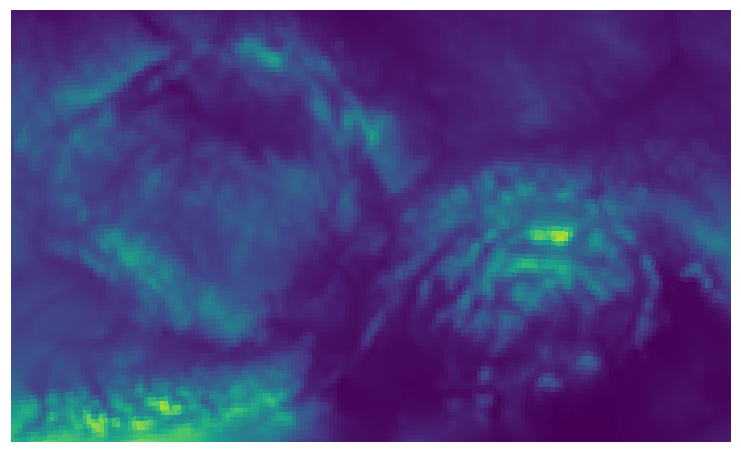

In [4]:
#fig,ax = plt.subplots(1, 1, figsize=(10, 6))
#viz_tools.set_aspect(ax, coords='map', lats=lats)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
im=ax.pcolormesh(x_L[:], y_L[:], altitude_Small[:])
#fig.colorbar(im)
plt.xlim(1300000,2530000)
plt.ylim(6000000,6650000)
plt.axis('off')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.savefig('/data/mappa2.png', dpi=300,bbox_inches='tight',pad_inches=-0.1)

In [5]:
min_lon, min_lat = p(1300000, 6000000, inverse=True)
max_lon, max_lat = p(2530000, 6650000, inverse=True)

In [9]:
import folium
from folium import plugins
from scipy.ndimage import imread


m = folium.Map([float(lat_Small.mean()), float(lon_Small.mean())],tiles='Stamen Terrain', zoom_start = 7)

datas=plt.imread('/data/mappa2.png')

m.add_child(folium.raster_layers.ImageOverlay(datas,opacity=0.8,bounds=[[min_lat,min_lon],[max_lat,max_lon]]))

m.save("MapaNetcdf.html")
display(m)